# RSSI & IQR 방식을 이용한 스푸핑 공격 감지

IQR 방식을 도입하여 우리의 BLE 장치의 RSSI 이상치 값의 범위를 설정한다.   
이후에 Anchor Point (AP)로부터 거리가 각각 다른 스푸핑 공격 데이터가 있다고 가정할 때의 IQR 방식을 도입한 시스템의 스푸핑 공격 감지 정확도를 측정한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Check incoming RSSI value in IQR range
def check_val(min, max, val):
    if min < val < max:
        return 0
    else:
        if val < min:
            return min - val
        else:
            return val - max
        
# Using Interqurtile range (IQR)
# Check Spoofing Attack
def check_rssi(rssi_arr, curr, prev):
    Q1 = np.percentile(rssi_arr, 25)
    Q3 = np.percentile(rssi_arr, 75)
    IQR = (Q3 - Q1) * 1.5

    min = Q1 - IQR
    max = Q3 + IQR

    curr_val = check_val(min, max, curr)
    prev_val = check_val(min, max, prev)

    if curr_val == 0 and prev_val == 0:
        # Not Spoofing Attack
        return False
    else:
        # Spoofing Attack
        return True
    
# Check Interqurtile range (IQR) & RSSI Boundary
def check_iqr (rssi_arr):
    Q1 = np.percentile(rssi_arr, 25)
    Q3 = np.percentile(rssi_arr, 75)
    IQR = (Q3 - Q1) * 1.5

    min = Q1 - IQR
    max = Q3 + IQR
    
    print("IQR :", IQR)
    print("Min RSSI :", min)
    print("Max RSSI :", max)

### Data
* Anchor Point (AP)로부터 약 0.5m 떨어진 지점에서 정상 BLE 장치의 비콘 메시지 수집
* 약 10000 (= 1000 * 10)개의 데이터 수집

### Progress
* 약 1000개의 정상 BLE 장치의 비콘 메시지가 들어온 후
* Anchor Point (AP)로부터 서로 다른 거리로부터 들어오는 스푸핑 공격이 있다고 가정

In [3]:
# Read Data Files
df = []
df_rssi = []

for i in range(1,10):
    file = './data/gal_data' + str(i) + '.csv'
    
    tmp = pd.read_csv(file)
    tmp_rssi = tmp['rssi']
    
    df.append(tmp)
    df_rssi.append(tmp_rssi)
    
    print('-'*50)
    print("File :", file)
    print("Number of Beacon Message :", tmp.shape[0])
    print("Average RSSI :", np.mean(tmp_rssi))
    check_iqr(tmp_rssi)

--------------------------------------------------
File : ./data/gal_data1.csv
Number of Beacon Message : 1002
Average RSSI : -65.47604790419162
IQR : 4.5
Min RSSI : -71.5
Max RSSI : -59.5
--------------------------------------------------
File : ./data/gal_data2.csv
Number of Beacon Message : 1002
Average RSSI : -65.31037924151697
IQR : 4.125
Min RSSI : -70.875
Max RSSI : -59.875
--------------------------------------------------
File : ./data/gal_data3.csv
Number of Beacon Message : 1002
Average RSSI : -65.23952095808383
IQR : 6.0
Min RSSI : -73.0
Max RSSI : -57.0
--------------------------------------------------
File : ./data/gal_data4.csv
Number of Beacon Message : 1002
Average RSSI : -64.30738522954091
IQR : 4.5
Min RSSI : -70.5
Max RSSI : -58.5
--------------------------------------------------
File : ./data/gal_data5.csv
Number of Beacon Message : 1002
Average RSSI : -65.37924151696606
IQR : 4.5
Min RSSI : -71.5
Max RSSI : -59.5
-------------------------------------------------

### Anchor Point (AP)로부터 거리에 따른 전반적인 RSSI 값
* 0cm = -38
* 10cm = -48
* 25cm = -57
* 50cm = -64
* 1m = -72

In [4]:
# Different RSSI Value depending on the Distance
# Create Custom Spoofing Data
spoof_distance = ['0cm', '10cm', '25cm', '50cm', '1m']
spoof_data = [-38, -48, -57, -64, -72]

In [5]:
# Check Detection Accuracy
acc_arr = []

for i in range(5):
    acc = []
    for j in range(9):
        acc.append(check_rssi(df_rssi[j], spoof_data[i], df_rssi[j][1001]))
    acc_arr.append(acc)
    
acc_arr
acc_v = []
for i in range(5):
    print('-'*50)
    print("Spoofing Data's Distance :", spoof_distance[i])
    print("Spoofing Data's RSSI :", spoof_data[i])
    print("Detection Accuracy :", acc_arr[i].count(True)/ len(acc_arr[i])*100, "%")
    acc_v.append(acc_arr[i].count(True)/ len(acc_arr[i])*100)

--------------------------------------------------
Spoofing Data's Distance : 0cm
Spoofing Data's RSSI : -38
Detection Accuracy : 100.0 %
--------------------------------------------------
Spoofing Data's Distance : 10cm
Spoofing Data's RSSI : -48
Detection Accuracy : 100.0 %
--------------------------------------------------
Spoofing Data's Distance : 25cm
Spoofing Data's RSSI : -57
Detection Accuracy : 55.55555555555556 %
--------------------------------------------------
Spoofing Data's Distance : 50cm
Spoofing Data's RSSI : -64
Detection Accuracy : 0.0 %
--------------------------------------------------
Spoofing Data's Distance : 1m
Spoofing Data's RSSI : -72
Detection Accuracy : 66.66666666666666 %


Tag's Average Distance : 50cm


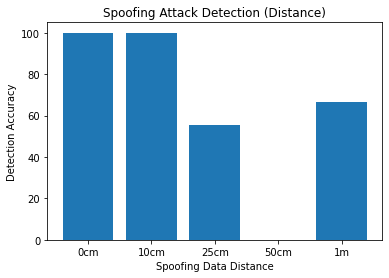

In [6]:
x = np.arange(5)

plt.bar(x, acc_v)
plt.xticks(x, spoof_distance)
plt.title('Spoofing Attack Detection (Distance)')
plt.xlabel('Spoofing Data Distance')
plt.ylabel('Detection Accuracy')

print("Tag's Average Distance : 50cm")
plt.show()

Tag's Average RSSI : -65.05599911288535


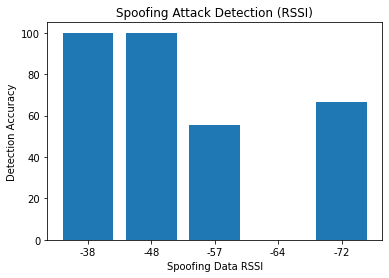

In [7]:
x = np.arange(5)

plt.bar(x, acc_v)
plt.xticks(x, spoof_data)
plt.title('Spoofing Attack Detection (RSSI)')
plt.xlabel('Spoofing Data RSSI')
plt.ylabel('Detection Accuracy')

print("Tag's Average RSSI :", np.mean(df_rssi))
plt.show()